## Data Dimension Reductions

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Imagine our data distributed on a high-dimensional surface

<img src="./figs/dimension_reduction.png">

### **Question**: If we have 2D data on a sphere, what is a function to flatten the data?

### Data point: $(x,y,z) \in \mathbb{S}$, $f(x,y,z)=(h_1, h_2)?$

<div>
<img src="./figs/sphere_map.png" width="700"/>
</div>

### **Answer**: consider $h_1 = \cos^{-1}\left(\frac{z}{\sqrt{x^2 + y^2 + z^2}}\right)$, $h_2 = \cos^{-1}\left(\frac{x}{\sqrt{x^2 + y^2}}\right)$

### In fact, $(h_1, h_2)$ is usually called $(\theta, \varphi)$ and you must have seen: $$ x = R \sin\theta\cos\varphi$$ $$ y = R \sin\theta\sin\varphi$$ $$ z = R \cos\theta$$

### What about reducing dimensions of the data?

<div>
<img src="./figs/faces.png" width="350"/>
</div>

<div>
<img src="./figs/MNIST.png" width="350"/>
</div>

## **Method 1: Principle Component Analysis (PCA, 1901 Karl Pearson)**

### The mathematics is simple: let a high-dim input $\mathbf{x} = (x_1, x_2, \ldots, x_n)$, usually $n$ is large

### **[Question 1]**: For all data points $\{\mathbf{x}_i \in \mathbb{R}^n \}$, find a vector $v \in \mathbb{R}^n$ such that $L(v) = \sum_i || \mathbf{x}_i - \langle \mathbf{x}_i, v \rangle v ||^2$ (**reconstruction loss**) is minimal

### **[Equivalently]**: We can write $L(v) = \sum_i || \mathbf{x}_i - \langle \mathbf{x}_i, v \rangle v ||^2$ as $L(f,g) =  \sum_i|| \mathbf{x}_i - g(f(\mathbf{x}_i))||^2$ by defining $f(\mathbf{x}) = \langle \mathbf{x}, v \rangle : \mathbb{R}^n \to \mathbb{R}^1 $ and $g(z) = z \, v  : \mathbb{R}^1 \to \mathbb{R}^n$

### **[Question 2]**: For all data points $\{\mathbf{x}_i\} \in \mathbb{R}^n$, find $k$ vectors $ v_1, \ldots, v_k \in \mathbb{R}^n$ such that $L(v_1, \ldots, v_k) = \sum_i || \mathbf{x}_i - \sum_{j=1}^k \langle \mathbf{x}_i, v_j \rangle v_j ||^2$ is minimal

### **[Equivalently]**: We can write $L(v_1, \ldots, v_k) = \sum_i || \mathbf{x}_i - \sum_{j=1}^k \langle \mathbf{x}_i, v_j \rangle v_j ||^2$ as $L(f,g) = \sum_i|| \mathbf{x}_i -g(f(\mathbf{x}_i)) ||^2$ by defining $f(\mathbf{x}) = (\langle \mathbf{x}, v_i \rangle, \ldots, \langle \mathbf{x}, v_k \rangle) : \mathbb{R}^n \to \mathbb{R}^k $ and $g(z) = \sum_{j=1}^k z_j \, v_j  : \mathbb{R}^k \to \mathbb{R}^n$

<div>
<img src="./figs/reconstruction.png" width="800"/>
</div>

### **[Solution, PCA]** This will end up finding the maximal **eigenvalues** and corresponding **eigenvectors** of $C = \frac{1}{N} \sum_{i=1}^N \mathbf{x}_i \mathbf{x}_i^T $ (called covariance matrix)

### i.e., eigen pairs $\{(\lambda_j, v_j)\}_{j=1}^k$ satisfies $C v_j = \lambda_j v_j$ with $\lambda_1 \geq \lambda_2 \geq \cdots \lambda_k$ and each $v_j \in \mathbb{R}^n$.

### These eigenvectors $v_1,\ldots, v_k$ are called *first* $k$ **principal components**, hence **PCA**

### Knowing $v_1,\ldots, v_k$ will give us $f$ and $g$ since $f(\mathbf{x}) = (\langle \mathbf{x}, v_i \rangle, \ldots, \langle \mathbf{x}, v_k \rangle) : \mathbb{R}^n \to \mathbb{R}^k $ and $g(z) = \sum_{j=1}^k z_j \, v_j  : \mathbb{R}^k \to \mathbb{R}^n$

### $f$ has a fancy name in *deep learning* call **encoder** and $g$ **decoder**

## **Example 1**: MNIST (hand-written digits data input)

In [2]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist.data.to_numpy(), mnist.target

# Convert the target to integer
y = y.astype(int)

# Normalize the data
X = X / 255.0

In [3]:
def plot_image_grid(data, title, size, n=10, n_cols=10):
    n_rows = (n + n_cols - 1) // n_cols
    plt.figure(figsize=(20, 2 * n_rows))
    for i in range(n):
        ax = plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(data[i].reshape(size, size), cmap='gray')
        plt.axis('on')
    plt.suptitle(title)
    plt.show()

### Visualize data images

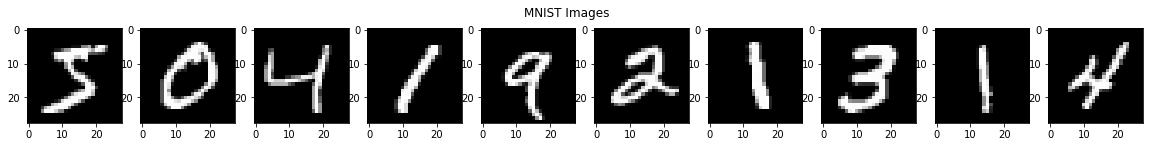

In [4]:
# Number of images to display
n_images = 10

# Plot original images
plot_image_grid(X[:n_images], title='MNIST Images', size=28, n=n_images)

## Apply PCA using only 1 line!!

In [5]:
k_components = 2  # select how many principal components you want

pca = PCA(n_components=k_components)  # PCA is applied here !!!

###  compute $\mathbf{z} = f(\mathbf{x})$ (the projection coefficients also called **latent variables**)

In [6]:
Z_pca = pca.fit_transform(X)

### Visualize $\mathbf{z} = f(\mathbf{x})$ latent variables (for $k=2$)

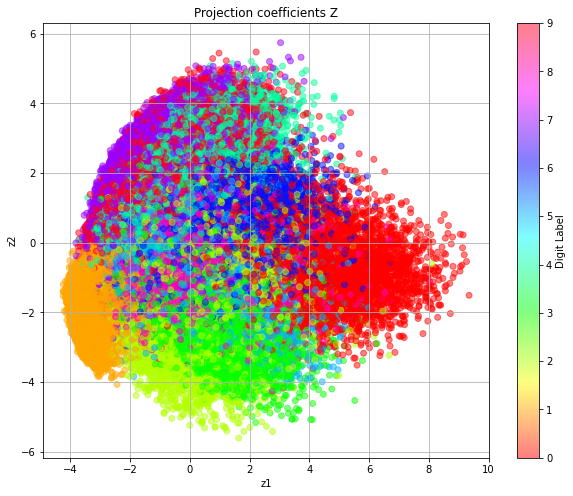

In [7]:
# Create a scatter plot of the reduced data
plt.figure(figsize=(10, 8))
scatter = plt.scatter(Z_pca[:, 0], Z_pca[:, 1], c=y, cmap='hsv', alpha=0.5)

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Digit Label')

# Add axis labels and title
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('Projection coefficients Z')
plt.grid(True)
plt.show()

## PCA reconstruction: $\tilde{\mathbf{x}} = g(\mathbf{z})$, i.e., $\tilde{\mathbf{x}} = g(f(\mathbf{x}))$

In [8]:
# Reconstruct the data from the reduced dimensions
X_reconstructed = pca.inverse_transform(Z_pca)

# print(f"Reconstructed shape: {X_reconstructed.shape}")

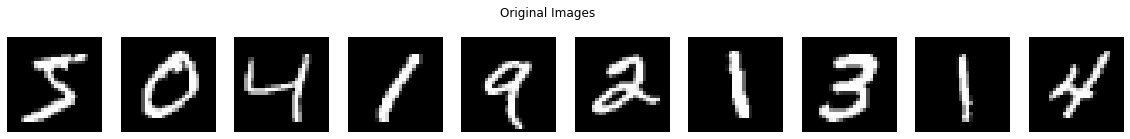

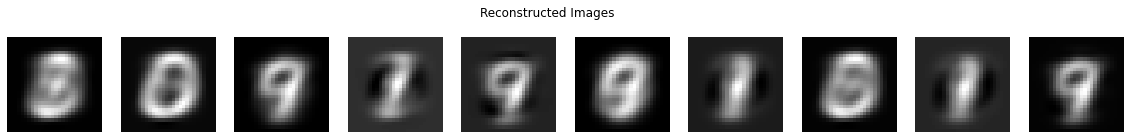

In [9]:
# Function to plot original and reconstructed images
def plot_digits(data, title, size, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(data[i].reshape(size, size), cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()


n_images = 10

# Plot original images
plot_digits(X[:n_images], size=28, n=n_images, title='Original Images')

# Plot reconstructed images
plot_digits(X_reconstructed[:n_images], size=28, n=n_images, title='Reconstructed Images')

## **Example 2**: Olivetti face images

In [10]:
from sklearn.datasets import fetch_olivetti_faces

# Load the Olivetti face dataset
faces = fetch_olivetti_faces()
X, y = faces.data, faces.target

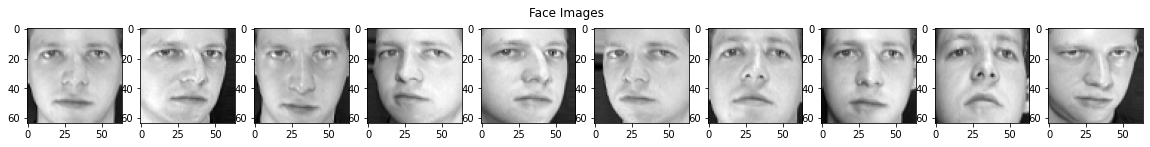

In [11]:
# Number of images to display
n_images = 10

# Plot original images
plot_image_grid(X[:n_images], title='Face Images', size=64, n=n_images)

## Apply PCA using only 1 line!!

In [12]:
k_components = 50  # select how many principal components you want

pca = PCA(n_components=k_components)  # PCA is applied here !!!

###  compute $\mathbf{z} = f(\mathbf{x})$ (also called latent variables)

In [13]:
Z_pca = pca.fit_transform(X)

### Visualize $\mathbf{z} = f(\mathbf{x})$ latent variables (for $k=2$)

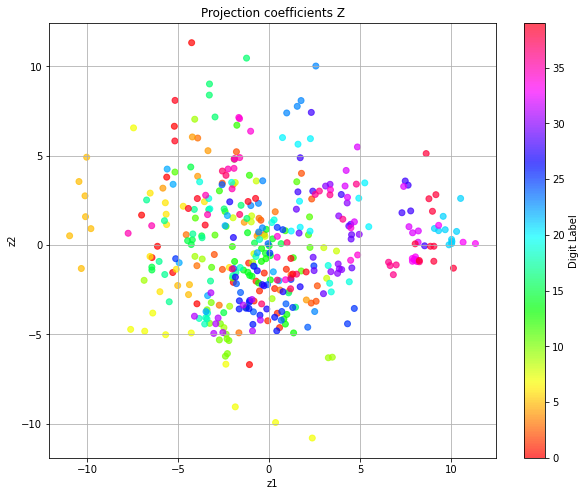

In [14]:
# Create a scatter plot of the reduced data
plt.figure(figsize=(10, 8))
scatter = plt.scatter(Z_pca[:, 0], Z_pca[:, 1], c=y, cmap='hsv', alpha=0.7)

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Digit Label')

# Add axis labels and title
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('Projection coefficients Z')
plt.grid(True)
plt.show()

## PCA reconstruction: $\tilde{\mathbf{x}} = g(\mathbf{z})$, i.e., $\tilde{\mathbf{x}} = g(f(\mathbf{x}))$

In [15]:
# Reconstruct the data from the reduced dimensions
X_reconstructed = pca.inverse_transform(Z_pca)

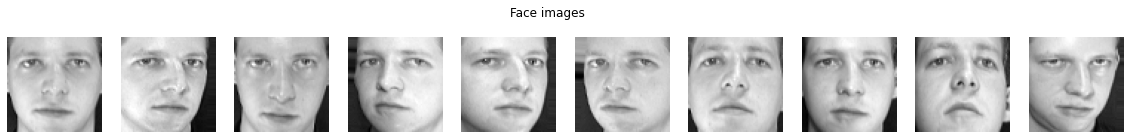

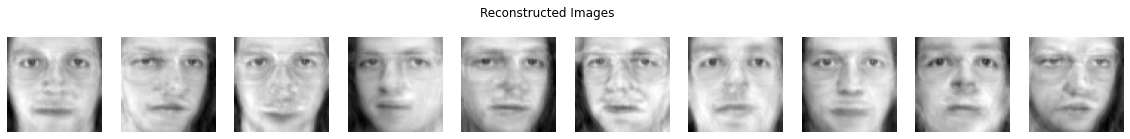

In [16]:
# Plot original images
plot_digits(X[:n_images], size=64, n=n_images, title='Face images')

# Plot reconstructed images
plot_digits(X_reconstructed[:n_images], size=64, n=n_images, title='Reconstructed Images')

### [AI generate new data!]

### Recall we have latent variables $\mathbf{z}_1 = f(\mathbf{x}_1)$ and $\mathbf{z}_2 = f(\mathbf{x}_2)$

### **[Question]** if we take $\mathbf{z}^* = a \mathbf{z}_1 + (1- a) \mathbf{z}_2$ for $0 \leq a \leq 1$ and put $g(\mathbf{z}^*)=?$

In [17]:
face1, face2 = np.random.choice(400, 2)

In [18]:
a = 0.5
Z_new = a * Z_pca[face1] + (1 - a) * Z_pca[face2]

In [19]:
X_new = pca.inverse_transform(Z_new)

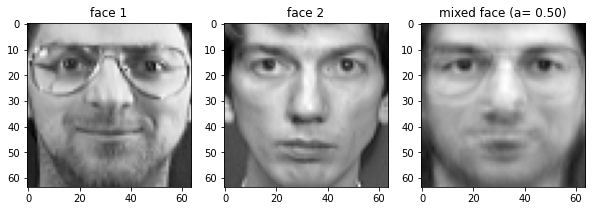

In [20]:
plt.figure(figsize=(10,6))
plt.subplot(1, 3, 1)
plt.imshow(X[face1].reshape(64, 64), cmap='gray')
plt.title(f'face 1')

plt.subplot(1, 3, 2)
plt.imshow(X[face2].reshape(64, 64), cmap='gray')
plt.title(f'face 2')

plt.subplot(1, 3, 3)
plt.imshow(X_new.reshape(64, 64), cmap='gray')
plt.title(f'mixed face (a= {a:.2f})')
plt.show()

## **Method 2: t-distribution Stochastic Neighbor Embedding  (t-SNE, 2008 L van der Maaten)**

## Key idea: Converting data to probabilites

### For a pair of data points $\mathbf{x}_i, \mathbf{x}_j$, we consider the **data probability**: $p(\mathbf{x}_i, \mathbf{x}_j)= p_{ij} = \frac{e^{- || \mathbf{x}_i -  \mathbf{x}_j ||^2}}{\sum_{m \neq n}e^{- || \mathbf{x}_m -  \mathbf{x}_n ||^2} }$

### If we have a dimension reduction function $z = f(x)$, then the paired data has projections

<div>
<img src="./figs/SNE.png" width="500"/>
</div>

### $\mathbf{z}_i = f(\mathbf{x}_i)$ and $\mathbf{z}_j = f(\mathbf{x}_i)$, and consider the **latent probability**: $q(\mathbf{z}_i, \mathbf{z}_j)= q_{ij} = \frac{(1 + || \mathbf{z}_i -  \mathbf{z}_j ||^2)^{-1}}{\sum_{m\neq n} (1 + || \mathbf{z}_m -  \mathbf{z}_n ||^2)^{-1} } $

### Basically the latent probability $q_{ij}$ is due to $f$. By changing $f$, we have different $q_{ij}$

<div>
<img src="./figs/similarity.png" width="450"/>
</div>

### **[Question]** how similar can $p_{ij}$ and $q_{ij}$ be? 

### **[t-SNE]** Find function $f$ that minimizes (loss function) $L(f) = \min D_{KL}(p_{ij} || q_{ij}) = p_{ij} \log \frac{p_{ij}}{q_{ij}} $, or 

### $$\min_f L(f) = - \left(\frac{e^{- || \mathbf{x}_i -  \mathbf{x}_j ||^2}}{\sum_{m \neq n}e^{- || \mathbf{x}_m -  \mathbf{x}_n ||^2} }\right) \log \frac{(1 + || f(\mathbf{x}_i) -  f(\mathbf{x}_j) ||^2)^{-1}}{\sum_{m\neq n} (1 + || f(\mathbf{x}_m) -  f(\mathbf{x}_n) ||^2)^{-1} } $$

## **Example 1**: Revisit MNIST

In [21]:
from sklearn.manifold import TSNE

# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist.data.to_numpy(), mnist.target

# Convert the target to integer
y = y.astype(int)

# Normalize the data
X = X / 255.0 - 0.5

N_samples = 6000
X_N = X[:N_samples]
y_N = y[:N_samples]

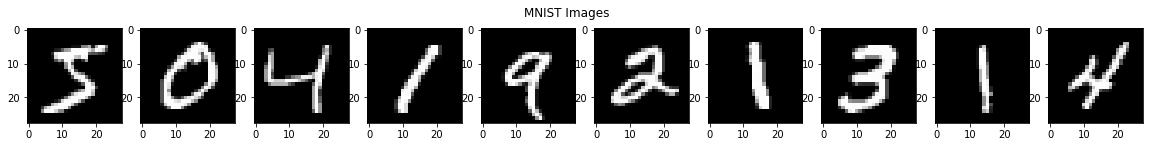

In [22]:
# Plot images
plot_image_grid(X_N, title='MNIST Images', size=28, n=n_images)

## Apply t-SNE using only 1 line!!

In [23]:
tsne = TSNE(n_components=2, n_iter=5000, random_state=42)

### Find best $Z = f(X)$ (what does "best" mean??)

In [24]:
# find best f that minimizes t-SNE loss function
Z_tsne = tsne.fit_transform(X_N)

/opt/homebrew/Caskroom/miniforge/base/envs/Beamform/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/Beamform/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


### Show $Z = f(X) $ (t-SNE latent variables)

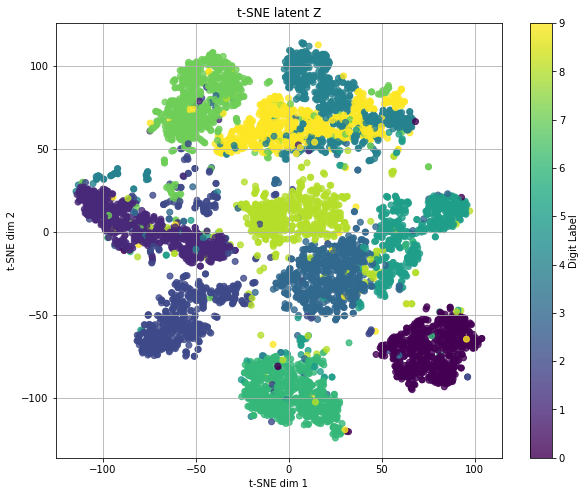

In [25]:
# Create a scatter plot of the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(Z_tsne[:, 0], Z_tsne[:, 1], c=y_N, cmap='viridis', alpha=0.8)

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Digit Label')

# Add axis labels and title
plt.xlabel('t-SNE dim 1')
plt.ylabel('t-SNE dim 2')
plt.title('t-SNE latent Z')
plt.grid(True)
plt.show()

### **Example 2**: Revisit Olivetti face images

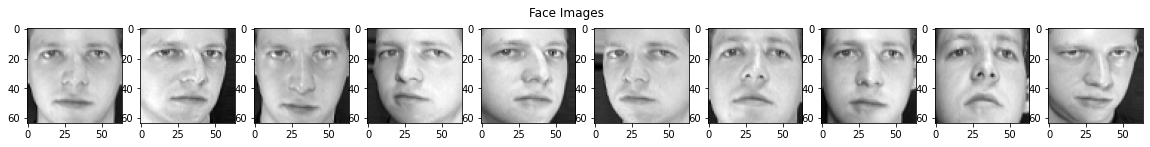

In [26]:
faces = fetch_olivetti_faces()
X, y = faces.data, faces.target

# Number of images to display
n_images = 10

# Plot original images
plot_image_grid(X[:n_images], title='Face Images', size=64, n=n_images)

### Find best $Z = f(X)$

In [27]:
tsne = TSNE(n_components=2, n_iter=8000, random_state=42)

# Fit and transform the data
Z_tsne = tsne.fit_transform(X)

/opt/homebrew/Caskroom/miniforge/base/envs/Beamform/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/Beamform/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


### Show $Z = f(X)$

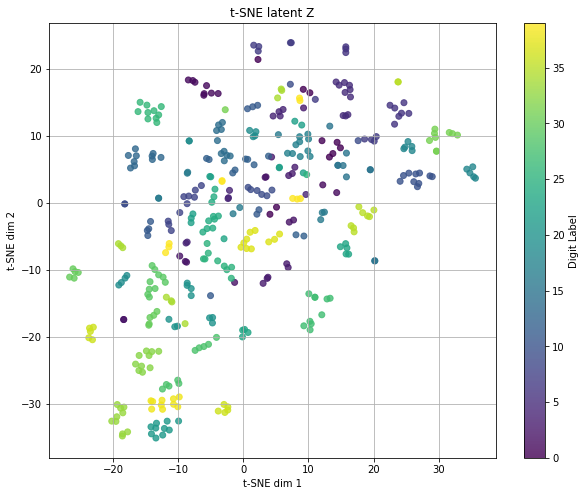

In [28]:
# Create a scatter plot of the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(Z_tsne[:, 0], Z_tsne[:, 1], c=y, cmap='viridis', alpha=0.8)

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Digit Label')

# Add axis labels and title
plt.xlabel('t-SNE dim 1')
plt.ylabel('t-SNE dim 2')
plt.title('t-SNE latent Z')
plt.grid(True)
plt.show()